In [3]:
!pip install pycaret

     |████████████████████████████████| 301 kB 12.0 MB/s 
     |████████████████████████████████| 15.6 MB 41.4 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 1.7 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 1.3 MB 44.3 MB/s 
     |████████████████████████████████| 2.0 MB 38.5 MB/s 
     |████████████████████████████████| 261 kB 41.1 MB/s 
     |████████████████████████████████| 114 kB 52.0 MB/s 
     |████████████████████████████████| 167 kB 47.8 MB/s 
     |████████████████████████████████| 6.8 MB 33.7 MB/s 
     |████████████████████████████████| 3.1 MB 38.9 MB/s 
     |████████████████████████████████| 102 kB 12.0 MB/s 
     |████████████████████████████████| 636 kB 52.2 MB/s 
     |████████████████

In [4]:
import pycaret

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
from pycaret.classification import *

warnings.filterwarnings('ignore') 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
df = pd.read_csv("application.csv")
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


In [8]:
print(df.shape)
df.info()

(25128, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25

In [9]:
df_modeling = df.sample(frac=0.9, random_state=123)
df_unseen = df.drop(df_modeling.index)

df_modeling.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(df_modeling.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (22615, 21)
Unseen Data For Predictions: (2513, 21)


In [10]:
stp = setup(data = df_modeling, 
            target = 'Status',
            train_size = 0.8,
            categorical_features = ['Applicant_Gender','Owned_Car','Owned_Realty',
                                    'Income_Type','Education_Type','Family_Status',
                                    'Housing_Type','Owned_Mobile_Phone','Owned_Work_Phone',
                                    'Owned_Phone','Owned_Email','Job_Title'], 
            ignore_features = ['Applicant_ID'],
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22615, 21)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9994,0.9726,0.9999,0.9994,0.9997,0.8799,0.8801,0.624
ada,Ada Boost Classifier,0.9993,0.9993,0.9998,0.9994,0.9996,0.9165,0.9204,0.663
dt,Decision Tree Classifier,0.9990,0.9449,0.9995,0.9995,0.9995,0.8895,0.8923,0.066
gbc,Gradient Boosting Classifier,0.9989,0.9501,0.9996,0.9994,0.9995,0.8824,0.8851,2.109
lightgbm,Light Gradient Boosting Machine,0.9986,0.9772,0.9991,0.9995,0.9993,0.8747,0.8800,0.278
rf,Random Forest Classifier,0.9965,0.9976,0.9999,0.9965,0.9982,0.3627,0.4493,1.098
et,Extra Trees Classifier,0.9964,0.9889,0.9998,0.9965,0.9982,0.3527,0.4330,1.180
knn,K Neighbors Classifier,0.9959,0.7399,1.0000,0.9959,0.9979,0.1661,0.2390,0.495
ridge,Ridge Classifier,0.9957,0.0000,0.9998,0.9959,0.9978,0.1824,0.2660,0.044
svm,SVM - Linear Kernel,0.9954,0.0000,1.0000,0.9954,0.9977,0.0000,0.0000,0.205


In [12]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [13]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

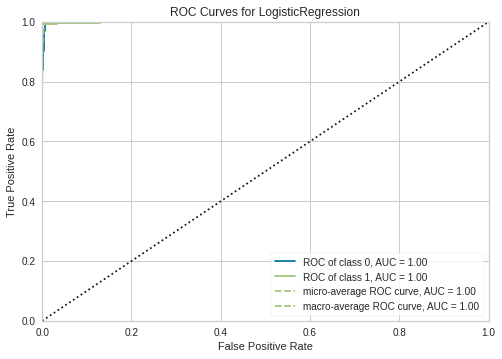

In [14]:
plot_model(best_model, plot = 'auc')


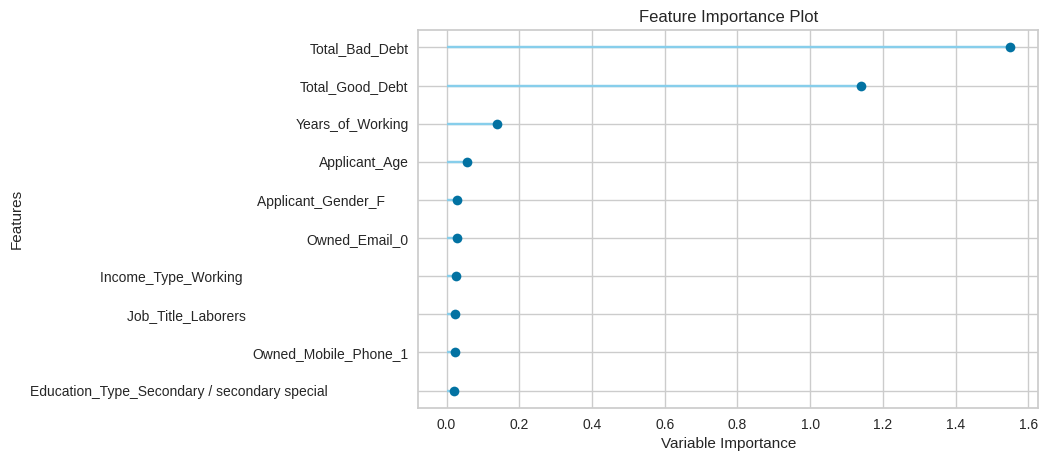

In [15]:
plot_model(best_model, plot='feature')


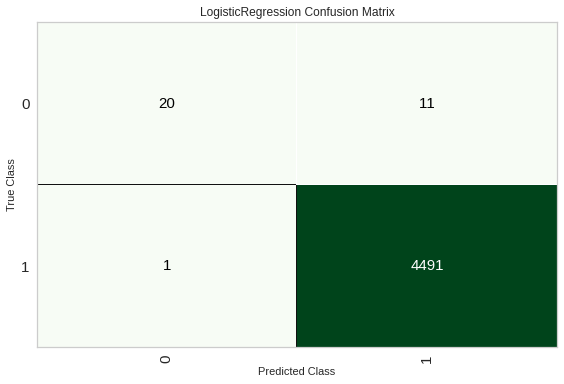

In [16]:
plot_model(best_model, plot = 'confusion_matrix')


In [17]:
logreg  = create_model('lr') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9983,0.9997,0.9994,0.9989,0.9992,0.7992,0.8010
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9956,0.7266,1.0000,0.9956,0.9978,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [18]:
tune_lr = tune_model(logreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
1,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
6,0.9994,1.0,0.9994,1.0,0.9997,0.9409,0.9425
7,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
9,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000


In [19]:
predict_model(tune_lr);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
model_final = finalize_model(tune_lr)
print(model_final)

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [21]:
predictions = predict_model(model_final, data=df_unseen)
predictions.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Label,Score
0,5008826,F,1,0,0,130500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,1,0,0,0,Accountants ...,2,30,4,7,23,1,1,1.0
1,5008832,F,0,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,1,0,Laborers ...,2,28,5,2,33,1,1,1.0
2,5008841,M,0,1,1,405000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,1,0,0,0,Managers ...,3,33,6,0,5,1,1,1.0
3,5008858,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,4,44,9,0,11,1,1,1.0
4,5008862,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,4,44,9,0,3,1,1,1.0


In [22]:
predictions.to_csv('predictions.csv', index=False)